## 线性可分

In [80]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x,y = make_blobs(n_samples =50 ,centers=2,random_state=0,cluster_std=0.6)#cluster_std=0.6 簇方差是0.6

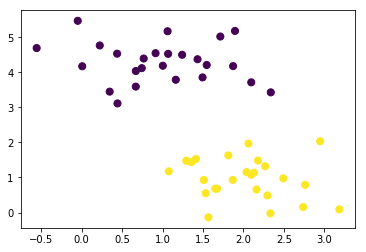

In [17]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='rainbow')
plt.show()

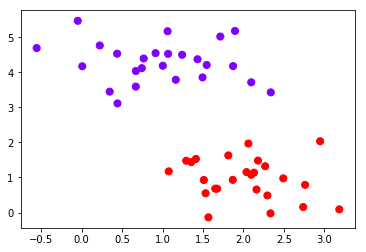

In [18]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='rainbow')
ax = plt.gca() #获取当前子图，没有则创建新子图

In [26]:
#网格制作函数
xlim = ax.get_xlim()
ylim = ax.get_ylim()

In [27]:
xlim

(-0.7541740493109252, 3.3838081780236036)

In [28]:
axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)

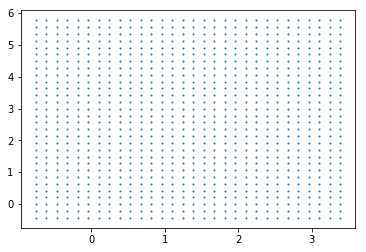

In [29]:
axisy,axisx = np.meshgrid(axisy,axisx)  #制作网格
xy = np.vstack([axisx.ravel(),axisy.ravel()]).T #将多个结构一致的数组按照行叠加起来
plt.scatter(xy[:,0],xy[:,1],s=1,cmap='raindow')
plt.show()

In [31]:
axisy.shape

(30, 30)

In [32]:
a = np.array([2,3,7])
b = np.array([5,8])
c,d = np.meshgrid(a,b)

In [34]:
c

array([[2, 3, 7],
       [2, 3, 7]])

In [35]:
d

array([[5, 5, 5],
       [8, 8, 8]])

In [36]:
c.ravel()

array([2, 3, 7, 2, 3, 7])

In [37]:
d.ravel()

array([5, 5, 5, 8, 8, 8])

In [38]:
np.vstack([c.ravel(),d.ravel()]).T

array([[2, 5],
       [3, 5],
       [7, 5],
       [2, 8],
       [3, 8],
       [7, 8]])

In [39]:
#建模，通过fit计算出决策边界
clf = SVC(kernel='linear').fit(x,y)
z=clf.decision_function(xy).reshape(axisx.shape)
#接口decision_function,每个样本到决策边界的距离

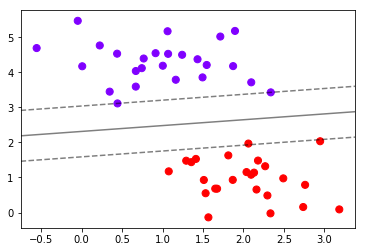

In [56]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='rainbow')
ax = plt.gca() #获取当前子图，没有则创建新子图
#画出决策边界和超平面
ax.contour(axisx,axisy,z  #用900个点画等高线图
           ,colors='k'
           ,levels=[-1,0,1]#画三条等高线分别是z为-1，z为0，z为1
           ,alpha=0.5
           ,linestyles=['--','-','--'])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

(-0.43660961990940284, 5.772756283035797)

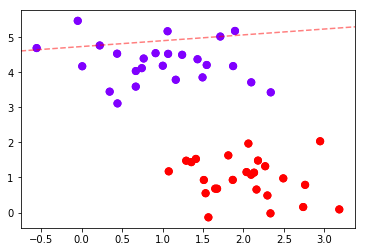

In [59]:
#以一个点作为例子，画这个点的等高线
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='rainbow')
ax = plt.gca() #获取当前子图，没有则创建新子图
distance_x10=clf.decision_function(x[10].reshape(1,2))
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='rainbow')
ax.contour(axisx,axisy,z,colors='r',levels=distance_x10,alpha=0.5)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

In [90]:
def plot_svc_decision_function(clf,ax=None):
    if ax is None:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    
    x=np.linspace(xlim[0],xlim[1],30)
    y=np.linspace(ylim[0],ylim[1],30) 
    xy_x,xy_y=np.meshgrid(x,y)
    xy=np.vstack([xy_x.ravel(),xy_y.ravel()]).T
    
    xy_distance = clf.decision_function(xy).reshape(axisx.shape)
    ax.contour(x,y,xy_distance ,levels=[-1,0,1],colors='k',alpha=0.5,linestyles=['--','-','--'] )
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

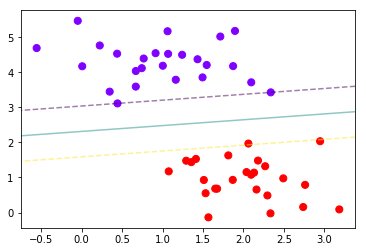

In [74]:
clf = SVC(kernel='linear').fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='rainbow')
plot_svc_decision_function(clf)

In [75]:
clf.predict(x)

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [76]:
clf.score(x,y)

1.0

In [77]:
from sklearn.metrics  import adjusted_mutual_info_score 
adjusted_mutual_info_score(clf.predict(x),y) 

1.0

In [78]:
clf.support_vectors_  #返回支持向量

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [79]:
clf.n_support_ #返回每个类中支持向量的个数

array([2, 1])

## 非线性：如环形数据

In [102]:
from sklearn.datasets import make_circles
x,y = make_circles(100,factor=0.1,noise=0.1,random_state=0) #画环形数据

In [103]:
x.shape

(100, 2)

In [104]:
y.shape

(100,)

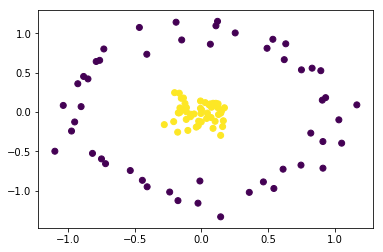

In [105]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

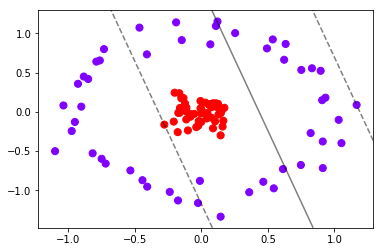

In [106]:
clf=SVC(kernel='linear').fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='rainbow')
plot_svc_decision_function(clf)

In [107]:
clf.score(x,y)  #效果奇差无比

0.68

In [109]:
#定义一个由x计算出来的新的维度r
z = np.exp(-(x**2).sum(1))
zlim=np.linspace(min(z),max(z),100)

In [113]:
zlim.shape

(100,)

In [121]:
from mpl_toolkits import mplot3d #绘制三维图像的库
#elev表示上下旋转角度
#azim表示左右旋转角度
def plot_3D(elev=30,azim=30,x=x,y=y):
    ax=plt.subplot(projection='3d') #建立一个用来画3D的图像画布
    ax.scatter3D(x[:,0],x[:,1],z,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

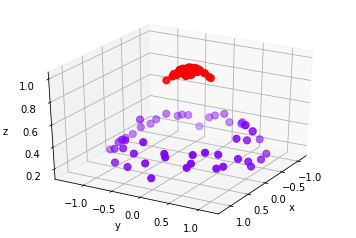

In [122]:
plot_3D()

D:\cn\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


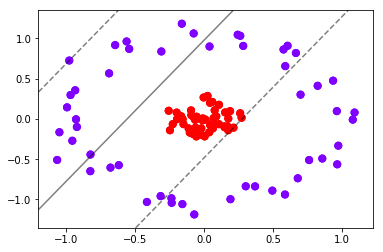

interactive(children=(Dropdown(description='elev', index=1, options=(0, 30, 60, 90), value=30), IntSlider(valu…

In [128]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
X,y = make_circles(100, factor=0.1, noise=.1)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x) 
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf) 
r = np.exp(-(X**2).sum(1))
rlim = np.linspace(min(r),max(r),0.2)

from mpl_toolkits import mplot3d
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()
from ipywidgets import interact,fixed
interact(plot_3D,elev=[0,30,60,90],azip=(-180,180),X=fixed(X),y=fixed(y))
plt.show()

## 非线性SVM与核函数

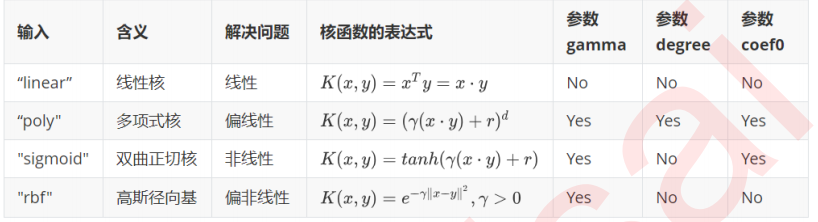

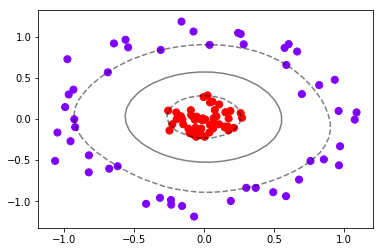

In [139]:
clf=SVC(kernel='rbf').fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
plot_svc_decision_function(clf)

In [140]:
clf.score(X,y)

1.0

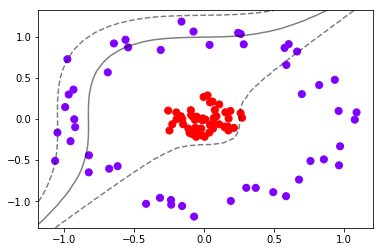

In [137]:
clf=SVC(kernel='poly').fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
plot_svc_decision_function(clf)

In [138]:
clf.score(X,y)

0.65

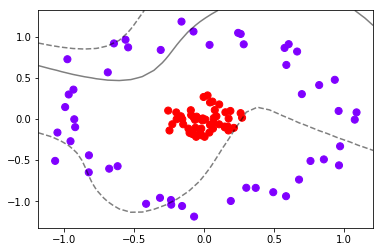

In [135]:
clf=SVC(kernel='sigmoid').fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
plot_svc_decision_function(clf)

In [136]:
clf.score(X,y)

0.57

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.datasets import make_circles,make_moons,make_blobs,make_classification

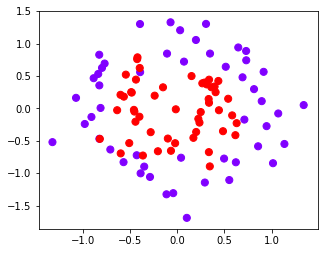

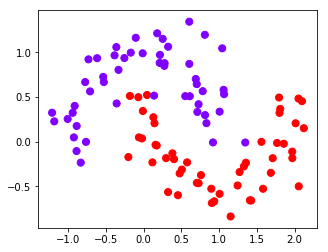

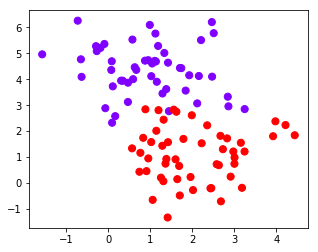

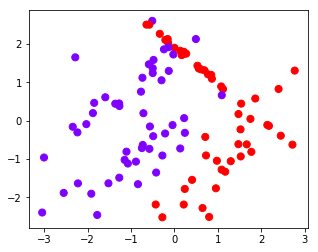

In [145]:
n_samples=100
datasets=[make_circles(n_samples=n_samples,noise=0.2,factor=0.5,random_state=0)
          ,make_moons(n_samples=n_samples,noise=0.2,random_state=0)
          ,make_blobs(n_samples=n_samples,centers=2,random_state=0)
          ,make_classification(n_samples=n_samples,n_features=2,n_informative=2,n_redundant=0)
         ]
Kernel=['linear','poly','rbf','sigmoid']
for x,y in datasets:
    plt.figure(figsize=(5,4))
    plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='rainbow')
    plt.show()

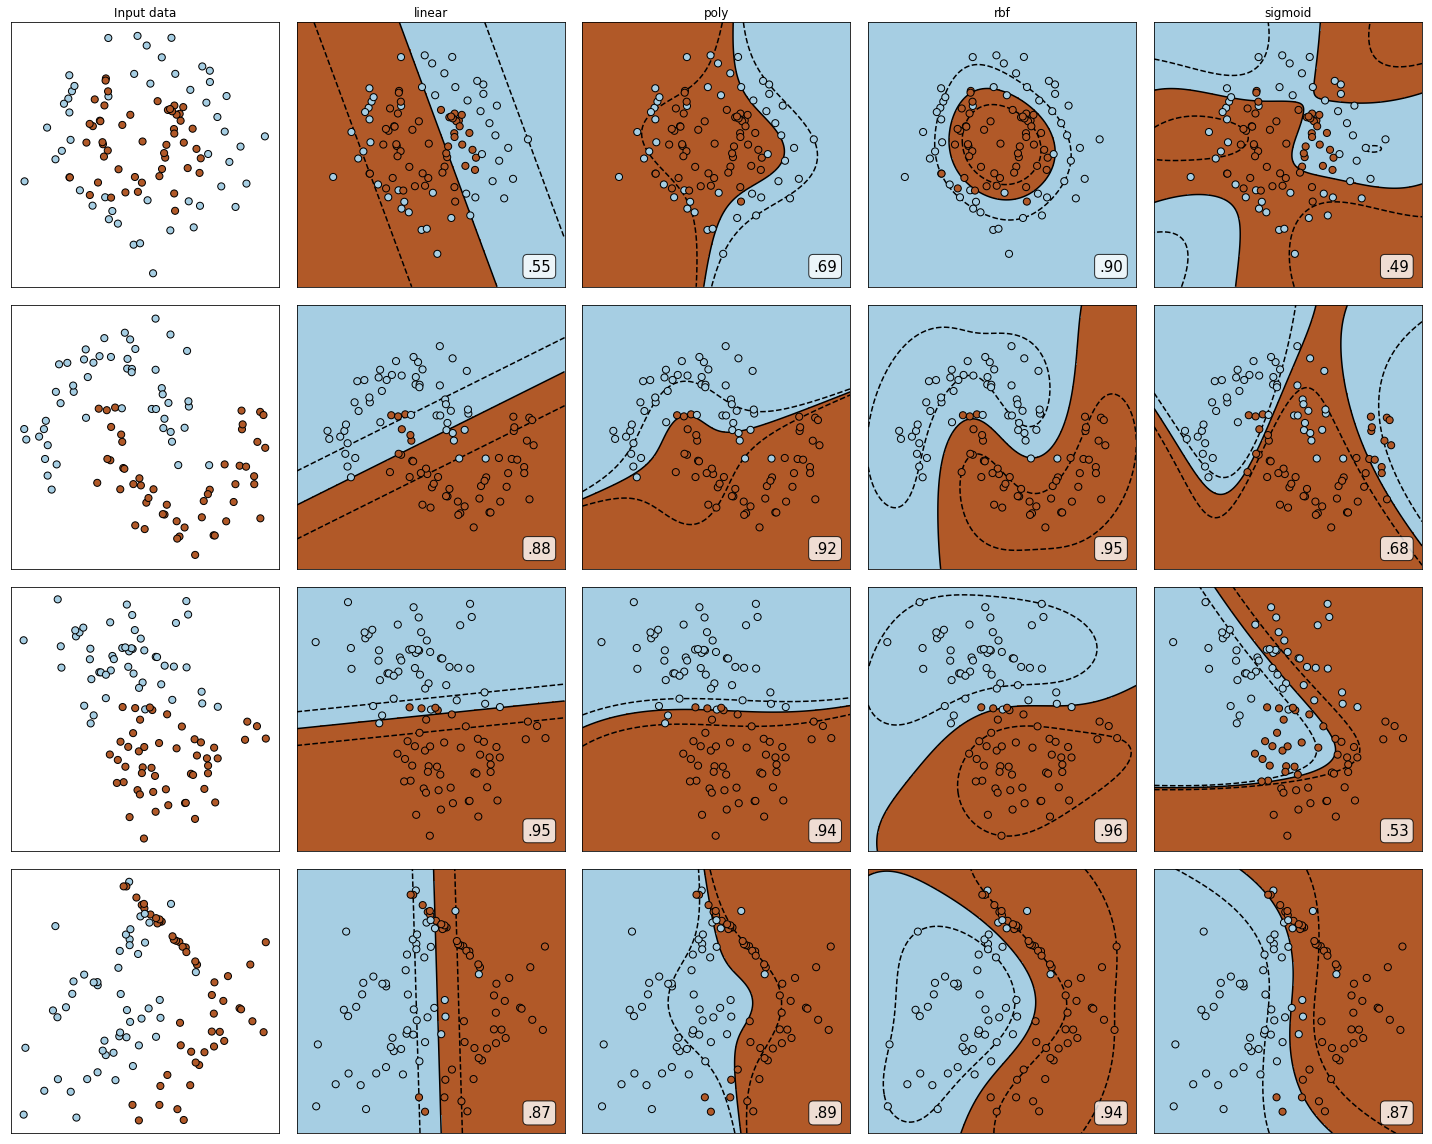

In [195]:
nrows=len(datasets)
ncols=len(Kernel)+1
fig,axes= plt.subplots(nrows,ncols,figsize=(20,16))
for ds_cnt,(x,y) in enumerate(datasets):
    ax = axes[ds_cnt,0]
    if ds_cnt == 0:
        ax.set_title('Input data')
    ax.scatter(x[:,0],x[:,1],c=y,s=50,cmap=plt.cm.Paired,zorder=10,edgecolor='k')#zorder=10越大，图像越显示在上面
    ax.set_xticks(())
    ax.set_yticks(())
    #第二层循环：在不同核函数中循环
    for ex_cnt,kernel in enumerate(Kernel):
        ax = axes[ds_cnt,ex_cnt+1]
        clf=SVC(kernel=kernel).fit(x,y)
        score=clf.score(x,y)
        #绘制图像本身散点图
        ax.scatter(x[:,0],x[:,1],c=y,s=50,zorder=10,cmap=plt.cm.Paired,edgecolors='k')
        #绘制支持向量
        ax.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=100,facecolors='none',edgecolors='k')
        #绘制决策边界
        x_max,x_min = x[:,0].max()+0.5,x[:,0].min()-0.5
        y_max,y_min=x[:,1].max()+0.5,x[:,1].min()-0.5
        #np.mgrid:合并np.linspace和np.meshgrid的做法的函数，分为200，j表示包括结束值
        XX,YY=np.mgrid[x_min:x_max:200j,y_min:y_max:200j]
        #np.c_ 类似于 np.vstack
        Z=clf.decision_function(np.c_[XX.ravel(),YY.ravel()]).reshape(XX.shape)
        #绘制等高的不同颜色
        ax.pcolormesh(XX,YY,Z>0,cmap=plt.cm.Paired)
        #绘制等高线
        ax.contour(XX,YY,Z,linestyles=['--','-','--'],colors=['k','k','k'],levels=[-1,0,1])
        ax.set_xticks(())
        ax.set_yticks(())
        #将标题放到第一行的项中
        if ds_cnt== 0:
            ax.set_title(kernel)
        ax.text(0.95, 0.06, ('%.2f' % score).lstrip('0') #去掉左边的0
                , size=15
                , bbox=dict(boxstyle='round', alpha=0.8, facecolor='white')
                #为分数添加一个白色的格子作为底色
                , transform=ax.transAxes #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
                , horizontalalignment='right' #位于坐标轴的什么方向
               )
plt.tight_layout() #图像紧缩
plt.show()

In [157]:
clf.support_vectors_[:,0]

array([-0.92873233,  0.76146945,  0.03937573, -0.61864626, -0.68887116,
        0.58870769,  0.69957432,  0.30208704,  0.27182012, -0.25684494,
       -0.24744582,  0.02507855,  0.26159487])

## 案例：探索核函数在乳腺癌数据集上的表现结果

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
from time import time
import datetime

In [44]:
data =load_breast_cancer()

In [45]:
X=data.data
Y=data.target

In [4]:
np.unique(Y)

array([0, 1])

In [5]:
from mpl_toolkits import mplot3d
def image(elev=30,azim=15,X=X,Y=Y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],X[:,2],c=Y)
    ax.view_init(elev=elev,azim=azim)
    plt.show()
from ipywidgets import interact,fixed
interact(image,elev=[0,15,30,45,60,75,90],azim=(-180,180),X=fixed(X[:,:3]),Y=fixed(Y))
plt.show()

interactive(children=(Dropdown(description='elev', index=2, options=(0, 15, 30, 45, 60, 75, 90), value=30), In…

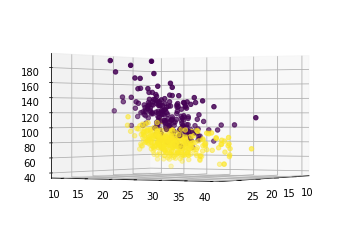

In [6]:
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:,0],X[:,1],X[:,2],c=Y)
ax.view_init(elev=0,azim=30)
plt.show()

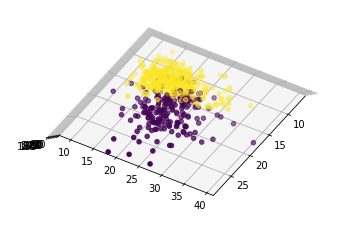

In [7]:
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:,0],X[:,1],X[:,2],c=Y)
ax.view_init(elev=90,azim=30)
plt.show()

In [8]:
Kernel=['linear', 'poly', 'rbf', 'sigmoid']

In [9]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.33,random_state=420)

In [ ]:
for kernel in Kernel:
    time0 = time()
    clf = SVC(kernel=kernel
              ,gamma = 'auto'
             # ,degree = 1 多项式核函数的次方，默认三次方
              ,cache_size=1000 #调用内存大小，默认200
             ).fit(Xtrain,Ytrain)
    print('The accuracy under kernel %s is %f'%(kernel,clf.score(Xtest,Ytest))) #因为在维度太高下plot多项式核函数三次方计算量太大

The accuracy under kernel linear is 0.936170


In [19]:
datetime.datetime.fromtimestamp(time()).strftime("%Y-%M-%d,%H:%M:%S:%f")#时间戳解析(时间戳)变成时间格式('时间')

'2021-05-28,19:05:13:701951'

In [21]:
for kernel in ['linear',  'rbf', 'sigmoid']:
    time0 = time()
    clf = SVC(kernel=kernel
              ,gamma = 'auto'
             # ,degree = 1 多项式核函数的次方，默认三次方
              ,cache_size=1000 #调用内存大小，默认200
             ).fit(Xtrain,Ytrain)
    print('The accuracy under kernel %s is %f'%(kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()).strftime("%M:%S:%f")) #python版本时间戳必须大于一天

The accuracy under kernel linear is 0.936170
12:37:924241
The accuracy under kernel rbf is 0.601064
12:37:946592
The accuracy under kernel sigmoid is 0.601064
12:37:954693


In [26]:
for kernel in Kernel:
    time0 = time()
    clf = SVC(kernel=kernel
              ,gamma = 'auto'
              ,degree = 1 #多项式核函数的次方，默认三次方
              ,cache_size=1000 #调用内存大小，默认200
             ).fit(Xtrain,Ytrain)
    print('The accuracy under kernel %s is %f'%(kernel,clf.score(Xtest,Ytest))) 
    #此数据是线性的，但是高斯核效果奇差，分析一下高斯核效果差的原因

The accuracy under kernel linear is 0.936170
The accuracy under kernel poly is 0.930851
The accuracy under kernel rbf is 0.601064
The accuracy under kernel sigmoid is 0.601064


In [30]:
import pandas as pd
data=pd.DataFrame(X)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]) #存在严重的量纲不同意的问题，而且有大量偏态问题，数据非正态分布

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
1%,8.458360,10.930400,53.827600,215.664000,0.068654,0.033351,0.000000,0.000000,0.129508,0.051504,...,9.207600,15.200800,58.270400,256.192000,0.087910,0.050094,0.000000,0.000000,0.176028,0.058580
5%,9.529200,13.088000,60.496000,275.780000,0.075042,0.040660,0.004983,0.005621,0.141500,0.053926,...,10.534000,16.574000,67.856000,331.060000,0.095734,0.071196,0.018360,0.024286,0.212700,0.062558
10%,10.260000,14.078000,65.830000,321.600000,0.079654,0.049700,0.013686,0.011158,0.149580,0.055338,...,11.234000,17.800000,72.178000,384.720000,0.102960,0.093676,0.045652,0.038460,0.226120,0.065792
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In [46]:
#标准化
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X).round(3)


In [47]:
data=pd.DataFrame(X)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02,569.000000,...,569.000000,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.000005,-0.000009,-1.560946e-17,0.000007,-0.000016,0.000016,0.000016,-0.000014,-8.390086e-18,0.000005,...,0.000007,-2.614585e-17,0.000004,-0.000004,-0.000004,0.000004,-0.000026,0.000025,0.000002,0.000004
std,1.000872,1.000878,1.000892e+00,1.000874,1.000880,1.000877,1.000881,1.000891,1.000883e+00,1.000884,...,1.000888,1.000892e+00,1.000882,1.000876,1.000874,1.000889,1.000883,1.000869,1.000861,1.000883
min,-2.030000,-2.229000,-1.985000e+00,-1.454000,-3.112000,-1.610000,-1.115000,-1.262000,-2.744000e+00,-1.820000,...,-1.727000,-2.224000e+00,-1.693000,-1.222000,-2.683000,-1.444000,-1.306000,-1.745000,-2.161000,-1.602000
1%,-1.610000,-1.945240,-1.570880e+00,-1.249000,-1.971480,-1.345200,-1.115000,-1.262000,-1.886160e+00,-1.601160,...,-1.462200,-1.706120e+00,-1.459560,-1.097440,-1.948520,-1.298600,-1.306000,-1.745000,-1.844800,-1.405840
5%,-1.305800,-1.443000,-1.296600e+00,-1.078400,-1.516800,-1.207200,-1.052600,-1.117200,-1.448200e+00,-1.257600,...,-1.187800,-1.482600e+00,-1.173600,-0.966200,-1.605600,-1.164400,-1.217600,-1.375400,-1.251400,-1.185200
10%,-1.098000,-1.212600,-1.076800e+00,-0.948000,-1.188600,-1.035200,-0.943000,-0.974000,-1.152800e+00,-1.057400,...,-1.042400,-1.282600e+00,-1.045200,-0.871400,-1.288800,-1.021200,-1.086800,-1.159000,-1.034400,-1.006400
25%,-0.689000,-0.726000,-6.920000e-01,-0.667000,-0.711000,-0.747000,-0.744000,-0.738000,-7.030000e-01,-0.723000,...,-0.675000,-7.490000e-01,-0.690000,-0.642000,-0.691000,-0.681000,-0.757000,-0.756000,-0.642000,-0.692000
50%,-0.215000,-0.105000,-2.360000e-01,-0.295000,-0.035000,-0.222000,-0.342000,-0.398000,-7.200000e-02,-0.178000,...,-0.269000,-4.400000e-02,-0.286000,-0.341000,-0.047000,-0.270000,-0.218000,-0.223000,-0.127000,-0.216000
75%,0.469000,0.584000,5.000000e-01,0.364000,0.636000,0.494000,0.526000,0.647000,5.310000e-01,0.471000,...,0.522000,6.580000e-01,0.540000,0.358000,0.598000,0.540000,0.531000,0.713000,0.450000,0.451000


In [53]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.33,random_state=420)
for kernel in Kernel:
    time0 = time()
    clf = SVC(kernel=kernel
              ,gamma = 'auto'
              ,degree = 1 #多项式核函数的次方，默认三次方
              ,cache_size=1000 #调用内存大小，默认200
             ).fit(Xtrain,Ytrain)
    print('The accuracy under kernel %s is %f'%(kernel,clf.score(Xtest,Ytest))) 
    #无量纲化后所有核都提高了，高斯核提高效果拔群，最后一个提高效果也很好

The accuracy under kernel linear is 0.962766
The accuracy under kernel poly is 0.968085
The accuracy under kernel rbf is 0.968085
The accuracy under kernel sigmoid is 0.957447


### rbf核函数上模型的表现：调参

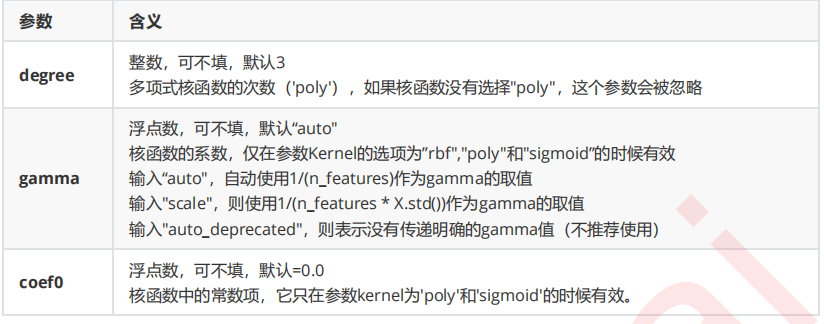

0.9680851063829787 0.020235896477251554


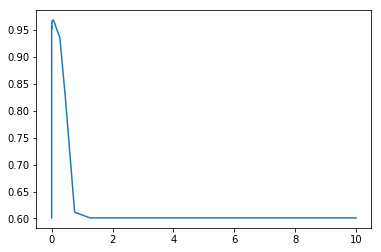

In [50]:
score=[]
gamma_range = np.logspace(-10,1,50)
for i in gamma_range:
    clf = SVC(gamma = i,kernel='rbf',cache_size=1000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print(max(score),gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)
plt.show()

### poly线性多项式和：网格搜索调参

In [55]:
from sklearn.model_selection import GridSearchCV as CV
from sklearn.model_selection import StratifiedShuffleSplit#交叉验证

In [57]:
gamma_range=np.logspace(-10,1,50)
coef0_range =np.linspace(0,5,10)
param_grid = dict(gamma=gamma_range,coef0=coef0_range)
cv=StratifiedShuffleSplit(n_splits=5,test_size=0.3,random_state=420)
grid=CV(SVC(kernel='poly',cache_size=1000),param_grid=param_grid,cv=cv).fit(X,Y) #交叉验证
print(grid.best_params_,grid.best_score_)#从我们输入的参数和参数取值中，返回最佳组合

{'coef0': 3.3333333333333335, 'gamma': 0.0025595479226995332} 0.9719298245614036


### SVM上的推广：重要参数C

软间隔：我们可以通过调整我们对决策边界的定义，将硬间隔时得出的数学结论推广到软间隔的情况上，让决策边界能够忍
受一小部分训练误差。这个时候，我们的决策边界就不是单纯地寻求最大边际了，因为对于软间隔地数据来说，边
际越大被分错的样本也就会越多，因此我们需要找出一个”最大边际“与”被分错的样本数量“之间的平衡。

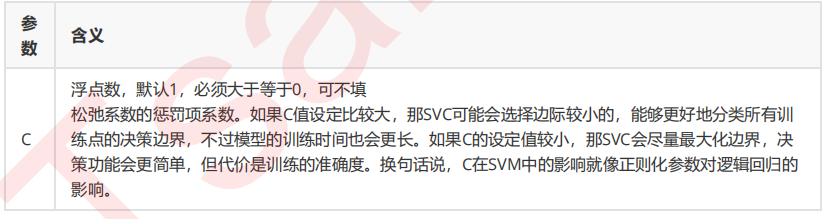

0.973404255319149 0.04002002002002002


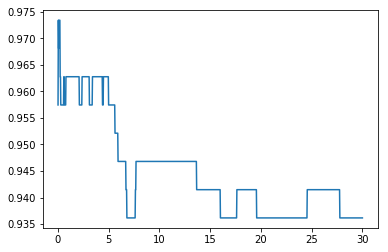

In [59]:
score =[]
C_range = np.linspace(0.01,30,1000)
for i in C_range:
    clf = SVC(kernel='linear',C=i,cache_size=1000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print(max(score),C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

In [ ]:
#换rbf 高斯核函数
score =[]
C_range = np.linspace(0.01,30,1000)
for i in C_range:
    clf = SVC(kernel='rpf',C=i,cache_size=1000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print(max(score),C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

## 支持向量机二分类样本不均衡问题
#### class_weight: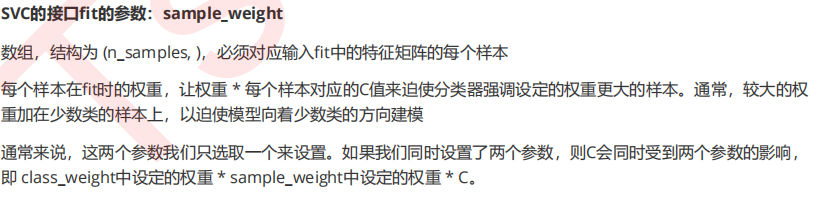
#### 建模时没有输入class_weight，训练时可以输入

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [2]:
class_1 =500
class_2 =50
centers =[[0,0],[2,2]]
cluster_std = [1.5,0.5]
X,Y=make_blobs(n_samples = [class_1,class_2],centers=centers,cluster_std=cluster_std,random_state=420)

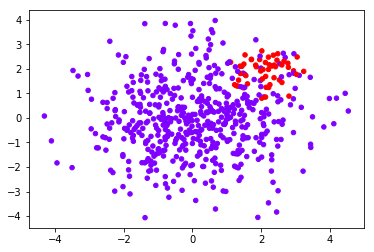

In [3]:
plt.scatter(X[:,0],X[:,1],c=Y,s=20,cmap='rainbow')
plt.show()

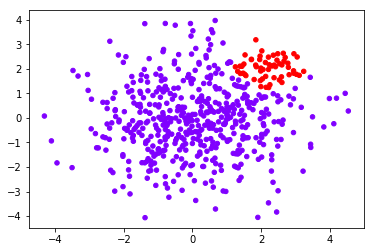

0.9490909090909091

In [4]:
#不设置class_weight的模型
cluster=SVC(kernel='rbf').fit(X,Y)
plt.scatter(X[:,0],X[:,1],c=cluster.predict(X),s=20,cmap='rainbow')
plt.show()
cluster.score(X,Y)

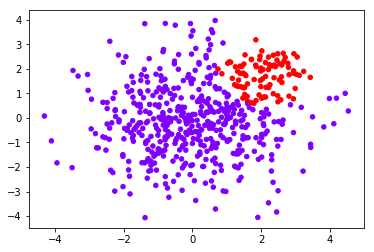

0.9218181818181819

In [5]:
#设定class_weight
wclf = SVC(kernel='rbf',class_weight={1:10}).fit(X,Y)
plt.scatter(X[:,0],X[:,1],c=wclf.predict(X),s=20,cmap='rainbow')
plt.show()
wclf.score(X,Y)

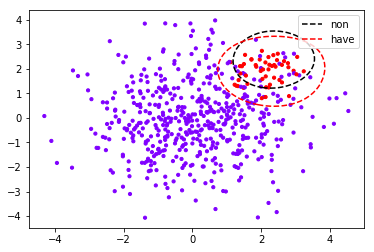

In [6]:
plt.figure(figsize=(6,4))
plt.scatter(X[:,0],X[:,1],c=Y,cmap='rainbow',s=10)
ax=plt.gca()
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()
x_lim_range = np.linspace(x_lim[0],x_lim[1],80)
y_lim_range = np.linspace(y_lim[0],y_lim[1],80)
xy_lim_range,yx_lim_range = np.meshgrid(x_lim_range,y_lim_range)
xy=np.vstack([xy_lim_range.ravel(),yx_lim_range.ravel()]).T
a=ax.contour(x_lim_range,y_lim_range
            ,cluster.decision_function(xy).reshape(xy_lim_range.shape)
            ,levels=[0]
            ,colors='k'
            ,linestyles=['--','-','--'])
b=ax.contour(x_lim_range,y_lim_range
            ,wclf.decision_function(xy).reshape(xy_lim_range.shape)
            ,levels=[0]
            ,colors='r'
            ,linestyles=['--','-','--'])
#画图例子
plt.legend([a.collections[0],b.collections[0]],['non','have'])
plt.show()

In [7]:
a.collections[0] #返回一条直线对象就是contour里面画的那条直线

### 混淆矩阵，精确度
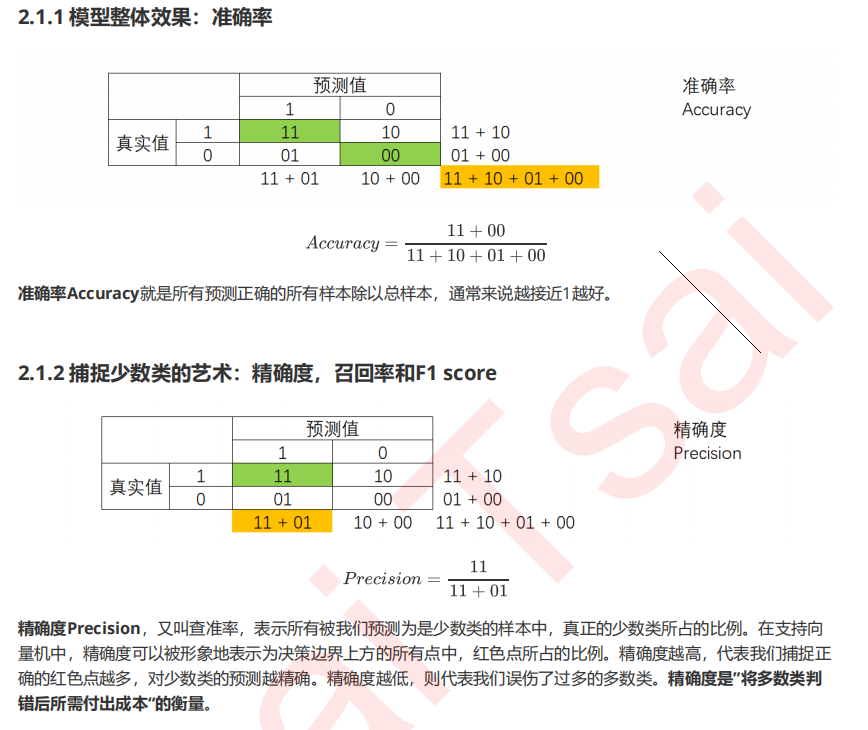

In [8]:
#对于没有class_weight，没有做样本平衡的灰色决策边界来说：
(Y[Y == cluster.predict(X)] == 1).sum()/(cluster.predict(X) == 1).sum()

0.6896551724137931

In [9]:
#对于有class_weight，做了样本平衡的红色决策边界来说：
(Y[Y == wclf.predict(X)] == 1).sum()/(wclf.predict(X) == 1).sum()

0.5376344086021505

### 召回率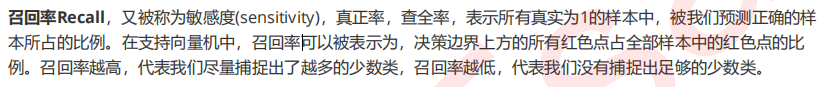

In [10]:
#所有predict为1的点 / 全部为1的点的比例
#对于没有class_weight，没有做样本平衡的灰色决策边界来说：
(Y[Y == cluster.predict(X)] == 1).sum()/(Y == 1).sum()

0.8

In [11]:
#对于有class_weight，做了样本平衡的红色决策边界来说：
(Y[Y == wclf.predict(X)] == 1).sum()/(Y == 1).sum()

1.0

In [12]:
class_1_=7
class_2_=4
centers=[[0,0],[1,1]]
cluster_std = [0.5,1]
X_,Y_ = make_blobs(n_samples=[class_1_,class_2_],centers=centers,cluster_std=cluster_std,random_state=0,shuffle=False)

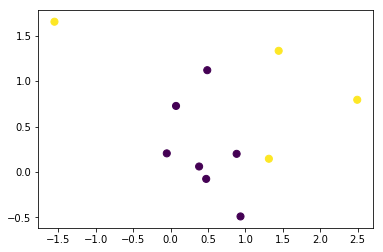

In [13]:
plt.scatter(X_[:,0],X_[:,1],c=Y_,s=50)

In [14]:
from sklearn.linear_model import LogisticRegression as LR

In [15]:
prob = LR().fit(X_,Y_).predict_proba(X_)

In [16]:
prob

array([[0.69461879, 0.30538121],
       [0.5109308 , 0.4890692 ],
       [0.82003826, 0.17996174],
       [0.78564706, 0.21435294],
       [0.77738721, 0.22261279],
       [0.65663421, 0.34336579],
       [0.76858638, 0.23141362],
       [0.34917129, 0.65082871],
       [0.36618382, 0.63381618],
       [0.66327186, 0.33672814],
       [0.6075288 , 0.3924712 ]])

In [17]:
import pandas as pd
import numpy as np
prob = pd.DataFrame(prob)

In [18]:
prob.columns=['0','1']

In [19]:
prob.columns

Index(['0', '1'], dtype='object')

In [20]:
for i in prob.index:
    if prob.loc[i,'1']>0.5:
        prob.loc[i,'predict']= 1
    else:
        prob.loc[i,'predict']= 0

In [21]:
prob

,0,1,predict
0,0.694619,0.305381,0.0
1,0.510931,0.489069,0.0
2,0.820038,0.179962,0.0
3,0.785647,0.214353,0.0
4,0.777387,0.222613,0.0
5,0.656634,0.343366,0.0
6,0.768586,0.231414,0.0
7,0.349171,0.650829,1.0
8,0.366184,0.633816,1.0
9,0.663272,0.336728,0.0


In [22]:
prob['Y_true'] = Y_

In [23]:
prob = prob.sort_values(by='1',ascending=False) #根据‘1’列来排序,不要逆序

In [24]:
prob

,0,1,predict,Y_true
7,0.349171,0.650829,1.0,1
8,0.366184,0.633816,1.0,1
1,0.510931,0.489069,0.0,0
10,0.607529,0.392471,0.0,1
5,0.656634,0.343366,0.0,0
9,0.663272,0.336728,0.0,1
0,0.694619,0.305381,0.0,0
6,0.768586,0.231414,0.0,0
4,0.777387,0.222613,0.0,0
3,0.785647,0.214353,0.0,0


In [25]:
from sklearn.metrics import confusion_matrix as CM,precision_score as P ,recall_score as R
#confusion_matrix混淆矩阵，精确率，召回率

In [26]:
CM(prob.loc[:,'Y_true'],prob.loc[:,'predict'],labels=[1,0])

array([[2, 2],
       [0, 7]], dtype=int64)

In [27]:
P(prob.loc[:,'Y_true'],prob.loc[:,'predict'],labels=[1,0])

1.0

In [28]:
R(prob.loc[:,'Y_true'],prob.loc[:,'predict'],labels=[1,0])

0.5

In [29]:
for i in prob.index:
    if prob.loc[i,'1']>0.4:
        prob.loc[i,'predict']= 1
    else:
        prob.loc[i,'predict']= 0

(550,)

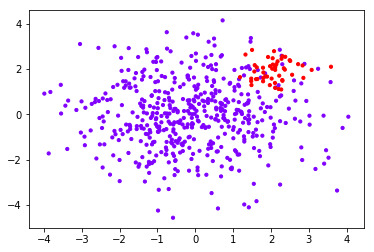

In [39]:
class_1 = 500 #类别1有500个样本
class_2 = 50 #类别2只有50个
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [1.5, 0.5] #设定两个类别的方差，通常来说，样本量比较大的类别会更加松散
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False) #看看数据集长什么样
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10) #其中红色点是少数类，紫色点是多数类
clf_proba = SVC(kernel="linear",C=1.0,probability=True).fit(X,y)
clf_proba.predict_proba(X)#计算判断概率
clf_proba.predict_proba(X).shape
clf_proba.decision_function(X)
clf_proba.decision_function(X).shape

In [41]:
prob=pd.DataFrame(X)

In [46]:
prob['Y_true']=y
prob['predict']=clf_proba.predict(X)

In [47]:
prob.head()

,0,1,Y_true,predict
0,2.646079,0.600236,0,0
1,1.468107,3.361340,0,1
2,2.801337,-1.465917,0,0
3,1.425133,-0.227036,0,0
4,-0.154828,0.615898,0,0


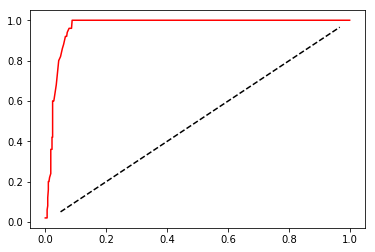

In [49]:
cm = CM(prob.loc[:,"Y_true"],prob.loc[:,"predict"],labels=[1,0])
cm
#FPR
cm[1,0]/cm[1,:].sum()
#Recall
cm[0,0]/cm[0,:].sum()
#开始绘图
recall = []
FPR = []
probrange = np.linspace(clf_proba.predict_proba(X)[:,1].min(),clf_proba.predict_proba(X)[:,1].max(),num=50,endpoint=False)
from sklearn.metrics import confusion_matrix as CM, recall_score as R
import matplotlib.pyplot as plot
for i in probrange:
    y_predict = []
    for j in range(X.shape[0]):
        if clf_proba.predict_proba(X)[j,1] > i:
            y_predict.append(1)
        else:
            y_predict.append(0)
    cm = CM(y,y_predict,labels=[1,0])
    recall.append(cm[0,0]/cm[0,:].sum())
    FPR.append(cm[1,0]/cm[1,:].sum())
recall.sort()
FPR.sort()
plt.plot(FPR,recall,c="red")
plt.plot(probrange+0.05,probrange+0.05,c="black",linestyle="--")
plt.show()

### ROC曲线，AUC面积
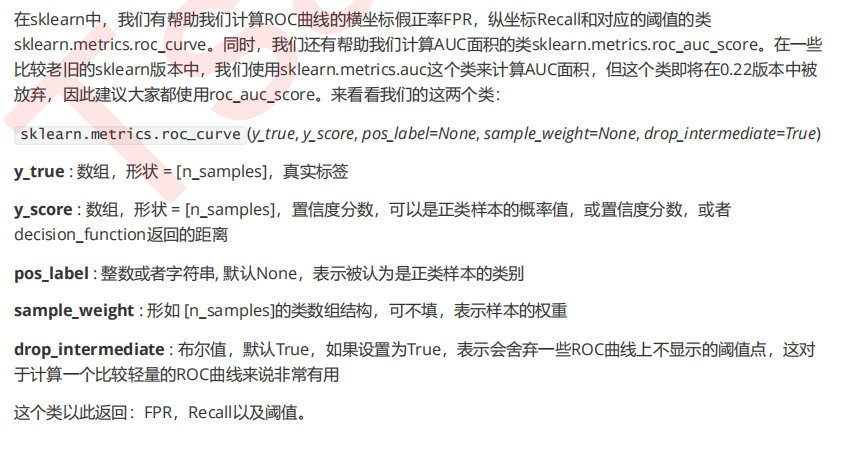

In [64]:
from sklearn.metrics import roc_curve
FRC,recall,thresholds = roc_curve(y,clf_proba.decision_function(X),pos_label=1) 
#pos_label=1真标签为1,让距离超平面距离为标签概率，返回假正率，召回率，相对应的阈值

In [67]:
FRC.shape

(45,)

In [68]:
recall.shape

(45,)

In [69]:
thresholds.shape

(45,)

In [61]:
from sklearn.metrics import roc_auc_score as AUC
area=AUC(y,clf_proba.decision_function(X))#面积接近于1
area

0.9696400000000001

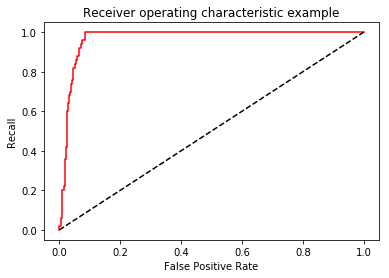

In [72]:
plt.figure()
plt.plot(FRC, recall, color='red',)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.show()

### 支持向量机是天生的二分类机器多分类问题非常难，而且效率极为低下,但是记住参数
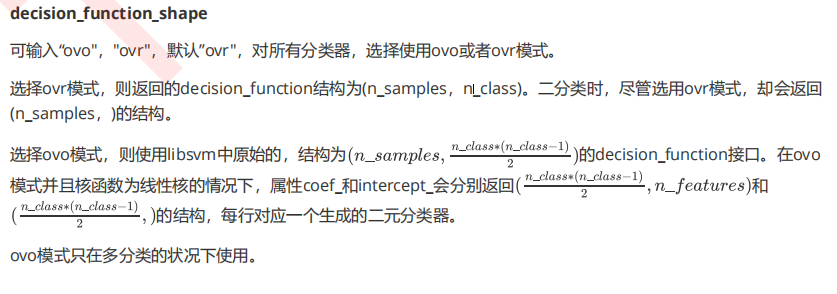

### SVC真案例，预测明天会不会降雨

In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [318]:
data=open(r'D:\数据分析题目\数据集\08支持向量机下\weatherAUS5000.csv')
data=pd.read_csv(data)
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2015-03-24,Adelaide,12.3,19.3,0.0,5.0,NaN,S,39.0,S,...,19.0,59.0,47.0,1022.2,1021.4,NaN,NaN,15.1,17.7,No
1,2011-07-12,Adelaide,7.9,11.4,0.0,1.0,0.5,N,20.0,NNE,...,7.0,70.0,59.0,1028.7,1025.7,NaN,NaN,8.4,11.3,No
2,2010-02-08,Adelaide,24.0,38.1,0.0,23.4,13.0,SE,39.0,NNE,...,19.0,36.0,24.0,1018.0,1016.0,NaN,NaN,32.4,37.4,No
3,2016-09-19,Adelaide,6.7,16.4,0.4,NaN,NaN,N,31.0,N,...,15.0,65.0,40.0,1014.4,1010.0,NaN,NaN,11.2,15.9,No
4,2014-03-05,Adelaide,16.7,24.8,0.0,6.6,11.7,S,37.0,S,...,24.0,61.0,48.0,1019.3,1018.9,NaN,NaN,20.8,23.7,No


In [319]:
#分开特征矩阵和标签
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [320]:
X.isnull().mean()  #缺失比例

Date             0.0000
Location         0.0000
MinTemp          0.0042
MaxTemp          0.0026
Rainfall         0.0100
Evaporation      0.4318
Sunshine         0.4858
WindGustDir      0.0662
WindGustSpeed    0.0662
WindDir9am       0.0698
WindDir3pm       0.0226
WindSpeed9am     0.0102
WindSpeed3pm     0.0162
Humidity9am      0.0128
Humidity3pm      0.0240
Pressure9am      0.0988
Pressure3pm      0.0992
Cloud9am         0.3778
Cloud3pm         0.3976
Temp9am          0.0066
Temp3pm          0.0176
dtype: float64

In [321]:
Y.isnull().mean()

0.0

In [322]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=0)

In [323]:
Xtrain.shape

(3500, 21)

In [324]:
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.index = range(i.shape[0])

In [325]:
Ytrain.value_counts()

No     2694
Yes     806
Name: RainTomorrow, dtype: int64

In [326]:
Ytest.value_counts()

No     1167
Yes     333
Name: RainTomorrow, dtype: int64

In [327]:
#有轻微的样本不均衡的问题
Ytrain.head()

0     No
1    Yes
2    Yes
3    Yes
4     No
Name: RainTomorrow, dtype: object

In [328]:
#标签编码
from sklearn.preprocessing import LabelEncoder #标签专用
encoder=LabelEncoder().fit(Ytrain)
encoder.transform(Ytrain)

array([0, 1, 1, ..., 0, 0, 1])

In [329]:
Ytrain = pd.DataFrame(encoder.transform(Ytrain))
Ytest = pd.DataFrame(encoder.transform(Ytest))
#如果在测试集中出现了YES和NO以外的值(训练集没有出现过的值)就会报错

In [330]:
Ytrain.to_csv('./weatherYtrain.csv')
Ytest.to_csv('./weatherXtrain.csv')

### 处理异常值

In [331]:
X.describe([0.01,0.25,0.5,0.75,0.99])

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,4979.000000,4987.000000,4950.000000,2841.000000,2571.000000,4669.000000,4949.000000,4919.000000,4936.000000,4880.000000,4506.000000,4504.000000,3111.000000,3012.000000,4967.000000,4912.000000
mean,12.133039,23.143794,2.413576,5.630834,7.559938,39.914329,14.028289,18.567798,68.955227,51.585451,1017.664514,1015.278286,4.492768,4.542829,16.918643,21.648046
std,6.390920,7.138694,7.961417,4.300544,3.823114,13.466609,8.808045,8.683527,18.813192,20.624550,7.018634,6.997767,2.861856,2.680326,6.479308,6.953797
min,-8.500000,-3.700000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,2.000000,2.000000,985.100000,980.200000,0.000000,0.000000,-5.300000,-4.100000
1%,-1.822000,8.886000,0.000000,0.400000,0.000000,15.000000,0.000000,2.000000,18.350000,9.000000,1000.605000,998.603000,0.000000,0.000000,2.400000,7.800000
25%,7.600000,17.900000,0.000000,2.600000,4.600000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.500000,1.000000,2.000000,12.200000,16.600000
50%,12.000000,22.500000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.600000,21.000000
75%,16.700000,28.300000,0.800000,7.600000,10.650000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1020.000000,7.000000,7.000000,21.500000,26.500000
99%,25.800000,39.914000,40.902000,20.440000,13.400000,78.000000,39.000000,43.000000,100.000000,98.000000,1033.300000,1030.997000,8.000000,8.000000,30.900000,38.289000
max,29.000000,46.400000,115.800000,56.000000,13.900000,122.000000,72.000000,65.000000,100.000000,100.000000,1038.200000,1036.900000,8.000000,8.000000,38.000000,45.900000


In [332]:
#发现异常值,首先需要观察，这个异常值频率
#异常值如果只有一个多半是输入错误，直接删除异常值样本
#如果异常值出现多次，跟业务人员沟通，如果确定为机器或人工错误删除样本异常值，如果识别的情况具体分析
#如果异常值占据百分之10以上了 - 把异常值替换为非异常值但是非干扰的项（均值，众数）或者把异常换成缺失
#如果异常值占据百分之10以上了 - 和标签相关性不大，可以考虑删除此特征

#### 处理时间

In [333]:
### 算法难理解的特征，先填补缺失值，再选择变为有效信息（如时间）
### 变为有效信息的话，连续变量会变成0-3000但是算法不会认为它是时间，分类变量会有3000多类，哑变量会增加三千个特征都不合适

In [334]:
type(Xtrain.iloc[0,0])

str

In [335]:
import datetime
str_p = Xtrain.iloc[0,0]
dateTime_p = datetime.datetime.strptime(str_p,'%Y-%m-%d')
print(dateTime_p) # 字符串转换时间但此处不用，我们可以月份提取 ,也可以时间序列分析(但是只能选取一个地点一个地点的分析)
print(Xtrain.iloc[0,0].split('-')[1]) #提取十月份
print(eval('10')) #转换

2009-10-16 00:00:00
10
10


In [336]:
X_location=X.groupby(by='Location')

In [337]:
X_location.size()

Location
Adelaide            106
Albany              100
Albury              105
AliceSprings         89
BadgerysCreek       121
Ballarat            129
Bendigo             128
Brisbane            101
Cairns              116
Canberra            126
Cobar               103
CoffsHarbour        108
Dartmoor            105
Darwin              121
GoldCoast            89
Hobart              100
Katherine            64
Launceston          108
Melbourne            81
MelbourneAirport    102
Mildura             100
Moree               108
MountGambier        100
MountGinini          96
Newcastle           108
Nhil                 58
NorahHead           110
NorfolkIsland       104
Nuriootpa            92
PearceRAAF           89
Penrith             102
Perth               115
PerthAirport         92
Portland             93
Richmond             95
Sale                 96
SalmonGums          122
Sydney              122
SydneyAirport       102
Townsville          112
Tuggeranong          92
Uluru  

In [338]:
#时间序列分析不好进行我们可以结合时间和今天是否下雨和下雨量和时间来创建一个新的特征

In [339]:
Xtrain.loc[Xtrain['Rainfall']>=1,'RainDate'] ='YES'
Xtrain.loc[Xtrain['Rainfall']<1,'RainDate']='No'
Xtrain.loc[Xtrain['Rainfall'].isnull(),'RainDate']=np.nan

D:\cn\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\cn\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [340]:
Xtest.loc[Xtrain.loc[:,'Rainfall']>=1,'RainDate'] ='YES'
Xtest.loc[Xtrain.loc[:,'Rainfall']<1,'RainDate']='No'
Xtest.loc[Xtrain.loc[:,'Rainfall'].isnull(),'RainDate']=np.nan

D:\cn\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\cn\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [341]:
Xtest.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainDate
0,2015-09-18,AliceSprings,7.0,23.2,0.0,8.2,5.9,ESE,41.0,ESE,...,15.0,27.0,15.0,1024.7,1020.0,6.0,7.0,16.7,22.2,No
1,2009-05-09,Sydney,11.1,22.8,0.0,4.4,9.8,NaN,NaN,W,...,9.0,74.0,46.0,1024.2,1020.4,1.0,1.0,13.4,21.0,YES
2,2011-06-11,Wollongong,11.7,14.7,4.0,NaN,NaN,S,59.0,SSW,...,19.0,86.0,71.0,1026.0,1025.0,8.0,8.0,11.8,13.4,No
3,2013-12-22,Watsonia,15.5,28.1,0.2,1.6,0.0,NNW,30.0,NNE,...,13.0,100.0,53.0,1008.9,1005.7,8.0,8.0,17.9,26.4,YES
4,2014-11-19,Ballarat,3.2,26.5,0.0,NaN,NaN,N,43.0,N,...,22.0,72.0,30.0,1019.1,1015.0,NaN,NaN,15.6,24.6,YES


In [342]:
Xtrain.Date.isnull().sum()

0

In [343]:
#要绕过Series格式，它不能使用split
mouth_list=[]
for i in range(Xtrain.shape[0]):
    mouth_list.append(int(Xtrain.loc[i,'Date'].split('-')[1]))

In [344]:
Xtrain.loc[:,'mouth']=mouth_list

D:\cn\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\cn\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [345]:
mouth_list=[]
for i in range(Xtest.shape[0]):
    mouth_list.append(int(Xtest.loc[i,'Date'].split('-')[1]))

In [346]:
Xtest.loc[:,'mouth']=mouth_list

D:\cn\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\cn\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [347]:
Xtrain.mouth.unique()

array([10,  2, 11,  9,  6,  3,  8,  7,  1,  4, 12,  5], dtype=int64)

In [348]:
Xtrain.drop('Date',axis=1,inplace=True)

D:\cn\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [349]:
Xtrain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainDate,mouth
0,NorfolkIsland,18.8,22.2,0.0,5.0,10.8,N,41.0,NNW,NNW,...,83.0,76.0,1017.5,1014.7,4.0,1.0,21.3,21.3,No,10
1,GoldCoast,21.0,24.4,38.6,NaN,NaN,NaN,NaN,NaN,S,...,98.0,100.0,1008.4,1004.8,NaN,NaN,24.1,23.6,YES,2
2,Darwin,25.0,33.9,0.0,6.8,7.4,N,31.0,SSW,NNW,...,72.0,56.0,1012.1,1007.1,7.0,3.0,29.4,33.3,No,11
3,Mildura,8.3,14.0,12.6,5.0,5.3,N,69.0,NNW,NNW,...,57.0,79.0,991.3,987.7,5.0,7.0,11.4,12.3,YES,9
4,Dartmoor,4.3,13.0,3.8,1.4,7.0,SE,17.0,NaN,SSE,...,99.0,75.0,1017.4,1015.5,NaN,NaN,6.4,12.3,YES,6


### 地点特征：找地图，根据气候不同进行分类

In [350]:
Xtrain.loc[:,'Location'].value_counts().count() #四十九个地点

49

In [351]:
cityll =  pd.read_csv(r'./cityll.csv',index_col=0)
city_climate = pd.read_csv(r'./Cityclimate.csv',index_col=0)

In [352]:
cityll.head()

,City,Latitude,Longitude,Latitudedir,Longitudedir
0,Adelaide,34.9285°,138.6007°,"S,",E
1,Albany,35.0275°,117.8840°,"S,",E
2,Albury,36.0737°,146.9135°,"S,",E
3,Wodonga,36.1241°,146.8818°,"S,",E
4,AliceSprings,23.6980°,133.8807°,"S,",E


In [353]:
cityll['Latitude']=cityll['Latitude'].apply(lambda x:x[:-1]) #经纬度去°号
cityll['Longitude']=cityll['Longitude'].apply(lambda x:x[:-1])

In [354]:
cityll.head()

,City,Latitude,Longitude,Latitudedir,Longitudedir
0,Adelaide,34.9285,138.6007,"S,",E
1,Albany,35.0275,117.8840,"S,",E
2,Albury,36.0737,146.9135,"S,",E
3,Wodonga,36.1241,146.8818,"S,",E
4,AliceSprings,23.6980,133.8807,"S,",E


In [355]:
city_climate.shape

(100, 1)

In [356]:
city_climate.iloc[:,-1].head()

City
Adelaide                  Warm temperate   
Albany                    Mild temperate   
Albury          Hot dry summer, cool winter
Wodonga         Hot dry summer, cool winter
AliceSprings    Hot dry summer, warm winter
Name: Climate, dtype: object

In [357]:
cityll.loc[:,'Climates']=city_climate.loc[:,'Climate'].values #Serise与DataFrame根据索引赋值，因此要将其转化为列表

In [358]:
cityll.drop(['Latitudedir','Longitudedir'],axis=1,inplace=True)

In [359]:
cityll.head()

,City,Latitude,Longitude,Climates
0,Adelaide,34.9285,138.6007,Warm temperate
1,Albany,35.0275,117.8840,Mild temperate
2,Albury,36.0737,146.9135,"Hot dry summer, cool winter"
3,Wodonga,36.1241,146.8818,"Hot dry summer, cool winter"
4,AliceSprings,23.6980,133.8807,"Hot dry summer, warm winter"


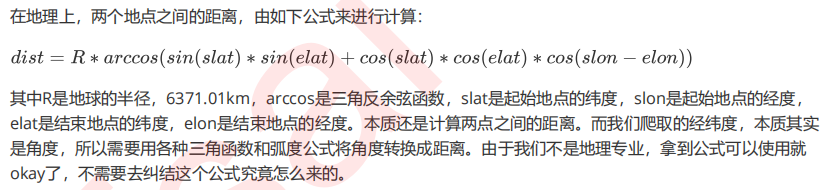

In [360]:
samplecity = pd.read_csv(r"./samplecity.csv",index_col=0)

In [361]:
samplecity.shape

(49, 5)

In [362]:
samplecity.head()

,City,Latitude,Longitude,Latitudedir,Longitudedir
0,Canberra,35.2809°,149.1300°,"S,",E
1,Sydney,33.8688°,151.2093°,"S,",E
2,Perth,31.9505°,115.8605°,"S,",E
3,Darwin,12.4634°,130.8456°,"S,",E
4,Hobart,42.8821°,147.3272°,"S,",E


In [363]:
#我们对samplecity也执行同样的处理：去掉经纬度中度数的符号，并且舍弃我们的经纬度的方向
samplecity["Latitudenum"] = samplecity["Latitude"].apply(lambda x:float(x[:-1]))
samplecity["Longitudenum"] = samplecity["Longitude"].apply(lambda x:float(x[:-1]))

In [364]:
samplecity.head()

,City,Latitude,Longitude,Latitudedir,Longitudedir,Latitudenum,Longitudenum
0,Canberra,35.2809°,149.1300°,"S,",E,35.2809,149.1300
1,Sydney,33.8688°,151.2093°,"S,",E,33.8688,151.2093
2,Perth,31.9505°,115.8605°,"S,",E,31.9505,115.8605
3,Darwin,12.4634°,130.8456°,"S,",E,12.4634,130.8456
4,Hobart,42.8821°,147.3272°,"S,",E,42.8821,147.3272


In [365]:
samplecityd = samplecity.iloc[:,[0,5,6]]

In [366]:
from math import radians,sin,cos,acos

In [367]:
cityll.loc[:,"slat"] = cityll.iloc[:,1].apply(lambda x : radians(float(x)))
cityll.loc[:,"slon"] = cityll.iloc[:,2].apply(lambda x : radians(float(x)))
samplecityd.loc[:,"elat"] = samplecityd.iloc[:,1].apply(lambda x : radians(float(x)))
samplecityd.loc[:,"elon"] = samplecityd.iloc[:,2].apply(lambda x : radians(float(x)))

D:\cn\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\cn\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [368]:
cityll.head()

,City,Latitude,Longitude,Climates,slat,slon
0,Adelaide,34.9285,138.6007,Warm temperate,0.609617,2.419039
1,Albany,35.0275,117.8840,Mild temperate,0.611345,2.057464
2,Albury,36.0737,146.9135,"Hot dry summer, cool winter",0.629605,2.564124
3,Wodonga,36.1241,146.8818,"Hot dry summer, cool winter",0.630484,2.563571
4,AliceSprings,23.6980,133.8807,"Hot dry summer, warm winter",0.413608,2.336659


In [369]:
import sys
for i in range(samplecityd.shape[0]):
    slat = cityll.loc[:,"slat"]
    slon = cityll.loc[:,"slon"]
    elat = samplecityd.loc[i,"elat"]
    elon = samplecityd.loc[i,"elon"]
    dist = 6371.01 * np.arccos(np.sin(slat)*np.sin(elat) +np.cos(slat)*np.cos(elat)*np.cos(slon.values - elon))
    city_index = np.argsort(dist)[0]
# #每次计算后，取距离最近的城市，然后将最近的城市和城市对应的气候都匹配到samplecityd中
    samplecityd.loc[i,"closest_city"] = cityll.loc[city_index,"City"]
    samplecityd.loc[i,"climate"] = cityll.loc[city_index,"Climates"]

D:\cn\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\cn\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\cn\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in arccos
  import sys


In [370]:
samplecityd.head()

,City,Latitudenum,Longitudenum,elat,elon,closest_city,climate
0,Canberra,35.2809,149.1300,0.615768,2.602810,Canberra,Cool temperate
1,Sydney,33.8688,151.2093,0.591122,2.639100,Sydney,Warm temperate
2,Perth,31.9505,115.8605,0.557641,2.022147,Perth,Warm temperate
3,Darwin,12.4634,130.8456,0.217527,2.283687,Darwin,"High humidity summer, warm winter"
4,Hobart,42.8821,147.3272,0.748434,2.571345,Hobart,Cool temperate


In [371]:
localfiner =samplecityd.iloc[:,[0,-1]]

In [372]:
localfiner.columns=['Location','Climate']

In [373]:
localfiner.head()

,Location,Climate
0,Canberra,Cool temperate
1,Sydney,Warm temperate
2,Perth,Warm temperate
3,Darwin,"High humidity summer, warm winter"
4,Hobart,Cool temperate


In [374]:
localfiner.index=localfiner.Location  #localfiner.set_index(key='Location')

In [375]:
localfiner.head()

,Location,Climate
Location,,
Canberra,Canberra,Cool temperate
Sydney,Sydney,Warm temperate
Perth,Perth,Warm temperate
Darwin,Darwin,"High humidity summer, warm winter"
Hobart,Hobart,Cool temperate


In [376]:
localfiner.to_csv('./Location.csv')

In [377]:
#将location中的内容替换，并且确保匹配进入的气候字符串中不含有逗号，气候两边不含有空格
#我们使用re这个模块来消除逗号
#re.sub(希望替换的值，希望被替换成的值，要操作的字符串)
#x.strip()是去掉空格的函数
import re
Xtrain["Location"] = Xtrain["Location"].map(localfiner.iloc[:,1]).apply(lambda x:re.sub(",","",x.strip())) #re来替换
Xtest["Location"] = Xtest["Location"].map(localfiner.iloc[:,1]).apply(lambda x:re.sub(",","",x.strip()))
#修改特征内容之后，我们使用新列名“Climate”来替换之前的列名“Location”
#注意这个命令一旦执行之后，就再没有列"Location"了，使用索引时要特别注意

D:\cn\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\cn\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


### 处理缺失值

In [378]:
Xtrain.isnull().mean()

Location         0.000000
MinTemp          0.004857
MaxTemp          0.002857
Rainfall         0.010571
Evaporation      0.434000
Sunshine         0.486857
WindGustDir      0.068286
WindGustSpeed    0.068286
WindDir9am       0.069714
WindDir3pm       0.020857
WindSpeed9am     0.009429
WindSpeed3pm     0.015429
Humidity9am      0.013429
Humidity3pm      0.023714
Pressure9am      0.103429
Pressure3pm      0.104286
Cloud9am         0.378857
Cloud3pm         0.398286
Temp9am          0.007429
Temp3pm          0.017714
RainDate         0.010571
mouth            0.000000
dtype: float64

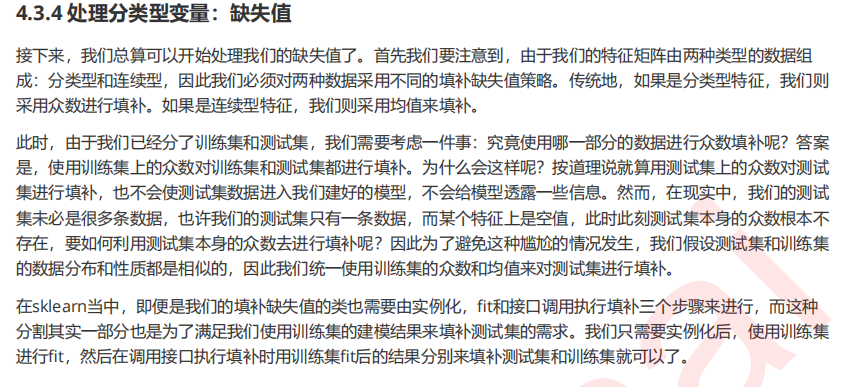

In [379]:
#首先找出，分类型特征都有哪些
cate=Xtrain.columns[Xtrain.dtypes=='object'].tolist()
cate

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainDate']

In [380]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 22 columns):
Location         3500 non-null object
MinTemp          3483 non-null float64
MaxTemp          3490 non-null float64
Rainfall         3463 non-null float64
Evaporation      1981 non-null float64
Sunshine         1796 non-null float64
WindGustDir      3261 non-null object
WindGustSpeed    3261 non-null float64
WindDir9am       3256 non-null object
WindDir3pm       3427 non-null object
WindSpeed9am     3467 non-null float64
WindSpeed3pm     3446 non-null float64
Humidity9am      3453 non-null float64
Humidity3pm      3417 non-null float64
Pressure9am      3138 non-null float64
Pressure3pm      3135 non-null float64
Cloud9am         2174 non-null float64
Cloud3pm         2106 non-null float64
Temp9am          3474 non-null float64
Temp3pm          3438 non-null float64
RainDate         3463 non-null object
mouth            3500 non-null int64
dtypes: float64(16), int64(1), object(5)
m

In [381]:
Xtrain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainDate,mouth
0,Warm temperate,18.8,22.2,0.0,5.0,10.8,N,41.0,NNW,NNW,...,83.0,76.0,1017.5,1014.7,4.0,1.0,21.3,21.3,No,10
1,Cool temperate,21.0,24.4,38.6,NaN,NaN,NaN,NaN,NaN,S,...,98.0,100.0,1008.4,1004.8,NaN,NaN,24.1,23.6,YES,2
2,High humidity summer warm winter,25.0,33.9,0.0,6.8,7.4,N,31.0,SSW,NNW,...,72.0,56.0,1012.1,1007.1,7.0,3.0,29.4,33.3,No,11
3,Hot dry summer cool winter,8.3,14.0,12.6,5.0,5.3,N,69.0,NNW,NNW,...,57.0,79.0,991.3,987.7,5.0,7.0,11.4,12.3,YES,9
4,Mild temperate,4.3,13.0,3.8,1.4,7.0,SE,17.0,NaN,SSE,...,99.0,75.0,1017.4,1015.5,NaN,NaN,6.4,12.3,YES,6


In [382]:
#众数填补分类特征
from sklearn.impute import SimpleImputer
s = SimpleImputer(missing_values = np.nan,strategy='most_frequent')
s=s.fit(Xtrain.loc[:,cate])

In [383]:
#训练集的众数同时填补训练集和测试集
Xtrain.loc[:,cate]=s.transform(Xtrain.loc[:,cate])
Xtest.loc[:,cate]=s.transform(Xtest.loc[:,cate])

D:\cn\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\cn\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [384]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 22 columns):
Location         3500 non-null object
MinTemp          3483 non-null float64
MaxTemp          3490 non-null float64
Rainfall         3463 non-null float64
Evaporation      1981 non-null float64
Sunshine         1796 non-null float64
WindGustDir      3500 non-null object
WindGustSpeed    3261 non-null float64
WindDir9am       3500 non-null object
WindDir3pm       3500 non-null object
WindSpeed9am     3467 non-null float64
WindSpeed3pm     3446 non-null float64
Humidity9am      3453 non-null float64
Humidity3pm      3417 non-null float64
Pressure9am      3138 non-null float64
Pressure3pm      3135 non-null float64
Cloud9am         2174 non-null float64
Cloud3pm         2106 non-null float64
Temp9am          3474 non-null float64
Temp3pm          3438 non-null float64
RainDate         3500 non-null object
mouth            3500 non-null int64
dtypes: float64(16), int64(1), object(5)
m

In [385]:
Xtrain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainDate,mouth
0,Warm temperate,18.8,22.2,0.0,5.0,10.8,N,41.0,NNW,NNW,...,83.0,76.0,1017.5,1014.7,4.0,1.0,21.3,21.3,No,10
1,Cool temperate,21.0,24.4,38.6,NaN,NaN,SW,NaN,N,S,...,98.0,100.0,1008.4,1004.8,NaN,NaN,24.1,23.6,YES,2
2,High humidity summer warm winter,25.0,33.9,0.0,6.8,7.4,N,31.0,SSW,NNW,...,72.0,56.0,1012.1,1007.1,7.0,3.0,29.4,33.3,No,11
3,Hot dry summer cool winter,8.3,14.0,12.6,5.0,5.3,N,69.0,NNW,NNW,...,57.0,79.0,991.3,987.7,5.0,7.0,11.4,12.3,YES,9
4,Mild temperate,4.3,13.0,3.8,1.4,7.0,SE,17.0,N,SSE,...,99.0,75.0,1017.4,1015.5,NaN,NaN,6.4,12.3,YES,6


In [386]:
#分类型变量编码，可以自己编码，也可以哑变量，还可以普通编码，主要看效果，此处先跑普通编码
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
#利用训练集进行fit
oe = oe.fit(Xtrain.loc[:,cate])
#用训练集的编码结果来编码训练和测试特征矩阵
#在这里如果测试特征矩阵报错，就说明测试集中出现了训练集中从未见过的类别
Xtrain.loc[:,cate] = oe.transform(Xtrain.loc[:,cate])
Xtest.loc[:,cate] = oe.transform(Xtest.loc[:,cate])
Xtrain.loc[:,cate].head()
Xtest.loc[:,cate].head()

D:\cn\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\cn\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Location,WindGustDir,WindDir9am,WindDir3pm,RainDate
0,3.0,2.0,2.0,2.0,0.0
1,6.0,12.0,13.0,0.0,1.0
2,6.0,8.0,11.0,11.0,0.0
3,2.0,6.0,5.0,6.0,1.0
4,0.0,3.0,3.0,6.0,1.0


In [387]:
#处理连续变量,追求效率之间均值填补，也不管什么缺失大不大了
col = Xtrain.columns

In [388]:
col

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainDate', 'mouth'],
      dtype='object')

In [389]:
for i in cate:
    col.drop(cate)

In [390]:
col

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainDate', 'mouth'],
      dtype='object')

In [391]:
impmean = SimpleImputer(missing_values= np.nan,strategy='mean').fit(Xtrain)
Xtrain.loc[:,col]=impmean.transform(Xtrain.loc[:,col])
Xtest.loc[:,col]=impmean.transform(Xtest.loc[:,col])

D:\cn\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\cn\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [392]:
Xtrain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainDate,mouth
0,6.0,18.8,22.2,0.0,5.000000,10.800000,3.0,41.000000,6.0,6.0,...,83.0,76.0,1017.5,1014.7,4.000000,1.000000,21.3,21.3,0.0,10.0
1,0.0,21.0,24.4,38.6,5.629783,7.561303,12.0,39.965655,3.0,8.0,...,98.0,100.0,1008.4,1004.8,4.445262,4.517094,24.1,23.6,1.0,2.0
2,1.0,25.0,33.9,0.0,6.800000,7.400000,3.0,31.000000,11.0,6.0,...,72.0,56.0,1012.1,1007.1,7.000000,3.000000,29.4,33.3,0.0,11.0
3,2.0,8.3,14.0,12.6,5.000000,5.300000,3.0,69.000000,6.0,6.0,...,57.0,79.0,991.3,987.7,5.000000,7.000000,11.4,12.3,1.0,9.0
4,4.0,4.3,13.0,3.8,1.400000,7.000000,9.0,17.000000,3.0,10.0,...,99.0,75.0,1017.4,1015.5,4.445262,4.517094,6.4,12.3,1.0,6.0


In [393]:
Xtest.drop('Date',inplace=True,axis=1)
Xtest.head()

D:\cn\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainDate,mouth
0,3.0,7.0,23.2,0.0,8.200000,5.900000,2.0,41.000000,2.0,2.0,...,27.0,15.0,1024.7,1020.0,6.000000,7.000000,16.7,22.2,0.0,9.0
1,6.0,11.1,22.8,0.0,4.400000,9.800000,12.0,39.965655,13.0,0.0,...,74.0,46.0,1024.2,1020.4,1.000000,1.000000,13.4,21.0,1.0,5.0
2,6.0,11.7,14.7,4.0,5.629783,7.561303,8.0,59.000000,11.0,11.0,...,86.0,71.0,1026.0,1025.0,8.000000,8.000000,11.8,13.4,0.0,6.0
3,2.0,15.5,28.1,0.2,1.600000,0.000000,6.0,30.000000,5.0,6.0,...,100.0,53.0,1008.9,1005.7,8.000000,8.000000,17.9,26.4,1.0,12.0
4,0.0,3.2,26.5,0.0,5.629783,7.561303,3.0,43.000000,3.0,6.0,...,72.0,30.0,1019.1,1015.0,4.445262,4.517094,15.6,24.6,1.0,11.0


In [394]:
#连续数据的无量纲化,分类型变量无量纲化没有意义
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss = ss.fit(Xtrain.loc[:,col])
Xtrain.loc[:,col]=ss.transform(Xtrain.loc[:,col])
Xtest.loc[:,col]=ss.transform(Xtest.loc[:,col])

D:\cn\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:\cn\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\cn\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:\cn\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a 

In [395]:
Xtrain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainDate,mouth
0,1.154390,1.059911,-0.133749,-0.300386,-0.193660,1.179450,-1.056671,0.079002,-0.238107,-0.384947,...,0.767973,1.206204,-0.037170,-0.096208,-0.196764,-1.692617,0.680771,-0.055372,-0.554907,1.038594
1,-1.455103,1.409167,0.175519,4.456530,0.000000,0.000000,0.877275,0.000000,-0.901976,0.047647,...,1.568157,2.378209,-1.405326,-1.589044,0.000000,0.000000,1.116299,0.277822,1.802102,-1.314589
2,-1.020188,2.044178,1.510995,-0.300386,0.359845,-0.058742,-1.056671,-0.684781,0.868340,-0.384947,...,0.181171,0.229533,-0.849043,-1.242224,1.128951,-0.730108,1.940693,1.683033,-0.554907,1.332742
3,-0.585272,-0.606994,-1.286476,1.252390,-0.193660,-0.823508,-1.056671,2.217594,-0.238107,-0.384947,...,-0.619013,1.352705,-3.976256,-4.167579,0.245141,1.194909,-0.859134,-1.359176,1.802102,0.744446
4,0.284559,-1.242005,-1.427052,0.167912,-1.300669,-0.204412,0.232626,-1.754077,-0.901976,0.480242,...,1.621503,1.157371,-0.052205,0.024425,0.000000,0.000000,-1.636863,-1.359176,1.802102,-0.137997


In [396]:
Xtest.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainDate,mouth
0,-0.150357,-0.813372,0.006827,-0.300386,0.790348,-0.605004,-1.271554,0.079002,-1.123265,-1.250136,...,-2.219382,-1.772642,1.045327,0.702987,0.687046,1.194909,-0.034740,0.075008,-0.554907,0.744446
1,1.154390,-0.162486,-0.049403,-0.300386,-0.378161,0.815276,0.877275,0.000000,1.310918,-1.682730,...,0.287862,-0.258802,0.970154,0.763303,-1.522478,-1.692617,-0.548042,-0.098832,1.802102,-0.432145
2,1.154390,-0.067234,-1.188072,0.192559,0.000000,0.000000,0.017743,1.453811,0.868340,0.696539,...,0.928010,0.962036,1.240778,1.456944,1.570856,1.676164,-0.796915,-1.199822,-0.554907,-0.137997
3,-0.585272,0.536027,0.695652,-0.275739,-1.239168,-2.753632,-0.412023,-0.761160,-0.459397,-0.384947,...,1.674849,0.083033,-1.330152,-1.453332,1.570856,1.676164,0.151915,0.683450,1.802102,1.626890
4,-1.455103,-1.416633,0.470730,-0.300386,0.000000,0.000000,-1.056671,0.231758,-0.901976,-0.384947,...,0.181171,-1.040139,0.203385,-0.050971,0.000000,0.000000,-0.205841,0.422689,1.802102,1.332742


In [397]:
#月份还原
Xtrain.mouth=pd.DataFrame(ss.inverse_transform(Xtrain.loc[:,col])).iloc[:,-1]

D:\cn\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [398]:
Xtest.mouth=pd.DataFrame(ss.inverse_transform(Xtest.loc[:,col])).iloc[:,-1]

D:\cn\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [399]:
Xtrain.mouth.unique()

array([10.,  2., 11.,  9.,  6.,  3.,  8.,  7.,  1.,  4., 12.,  5.])

In [404]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score
Ytrain = Ytrain.ravel()
Ytest = Ytest.ravel()
#建模选择自然是我们的支持向量机SVC，首先用核函数的学习曲线来选择核函数
#我们希望同时观察，精确性，recall以及AUC分数
for kernel in ["linear","poly","rbf","sigmoid"]:
    clf = SVC(kernel = kernel
              ,gamma="auto"
              ,degree = 1
              ,cache_size = 2000).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel,score,recall,auc))

linear 's testing accuracy 0.831333, recall is 0.459459', auc is 0.844621
poly 's testing accuracy 0.835333, recall is 0.459459', auc is 0.845805
rbf 's testing accuracy 0.842000, recall is 0.456456', auc is 0.834089
sigmoid 's testing accuracy 0.668667, recall is 0.270270', auc is 0.528379


In [406]:
#调参追求recall
for kernel in ["linear","poly","rbf","sigmoid"]:
    clf = SVC(kernel = kernel
              ,gamma="auto"
              ,degree = 1
              ,cache_size = 5000
              ,class_weight = "balanced").fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel,score,recall,auc))

linear 's testing accuracy 0.772000, recall is 0.744745', auc is 0.840439
poly 's testing accuracy 0.775333, recall is 0.738739', auc is 0.840529
rbf 's testing accuracy 0.782000, recall is 0.735736', auc is 0.843821
sigmoid 's testing accuracy 0.535333, recall is 0.528529', auc is 0.544519


In [407]:
clf = SVC(kernel = "linear"
          ,gamma="auto"
          ,cache_size = 5000
          ,class_weight = {1:10} #注意，这里写的其实是，类别1：10，隐藏了类别0：1这个比例
         ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest, result)
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
print("testing accuracy %f, recall is %f', auc is %f" %(score,recall,auc))

testing accuracy 0.602667, recall is 0.915916', auc is 0.830790


In [410]:
#追求准确率
valuec = pd.Series(Ytest).value_counts()
valuec
valuec[0]/valuec.sum()
from sklearn.metrics import confusion_matrix as CM
clf = SVC(kernel = "linear"
          ,gamma="auto"
          ,cache_size = 5000
         ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)
cm = CM(Ytest,result,labels=(1,0))
cm

array([[ 153,  180],
       [  73, 1094]], dtype=int64)

In [412]:
specificity = cm[1,1]/cm[1,:].sum()
specificity #几乎所有的0都被判断正确了，还有不少1也被判断正确了

0.9374464438731791

In [414]:
irange = np.linspace(0.01,0.05,10)
for i in irange:
    clf = SVC(kernel = "linear"
              ,gamma="auto"
              ,cache_size = 5000
              ,class_weight = {1:1+i}
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" % (1+i,score,recall,auc))

under ratio 1:1.010000 testing accuracy 0.832667, recall is 0.468468', auc is 0.844634
under ratio 1:1.014444 testing accuracy 0.832000, recall is 0.465465', auc is 0.844606
under ratio 1:1.018889 testing accuracy 0.832667, recall is 0.468468', auc is 0.844680
under ratio 1:1.023333 testing accuracy 0.832000, recall is 0.468468', auc is 0.844891
under ratio 1:1.027778 testing accuracy 0.832000, recall is 0.468468', auc is 0.844616
under ratio 1:1.032222 testing accuracy 0.834000, recall is 0.477477', auc is 0.845066
under ratio 1:1.036667 testing accuracy 0.834000, recall is 0.477477', auc is 0.845022
under ratio 1:1.041111 testing accuracy 0.833333, recall is 0.480480', auc is 0.845056
under ratio 1:1.045556 testing accuracy 0.834000, recall is 0.483483', auc is 0.845010
under ratio 1:1.050000 testing accuracy 0.834000, recall is 0.483483', auc is 0.845190


under C 0.010000, testing accuracy is 0.767333,recall is 0.750751', auc is 0.838713
under C 1.062105, testing accuracy is 0.773333,recall is 0.750751', auc is 0.840527
under C 2.114211, testing accuracy is 0.772667,recall is 0.750751', auc is 0.841132
under C 3.166316, testing accuracy is 0.774000,recall is 0.750751', auc is 0.841384
under C 4.218421, testing accuracy is 0.774000,recall is 0.750751', auc is 0.841291
under C 5.270526, testing accuracy is 0.774000,recall is 0.750751', auc is 0.841301
under C 6.322632, testing accuracy is 0.774000,recall is 0.750751', auc is 0.841242
under C 7.374737, testing accuracy is 0.774000,recall is 0.750751', auc is 0.841255
under C 8.426842, testing accuracy is 0.774000,recall is 0.750751', auc is 0.841296
under C 9.478947, testing accuracy is 0.774000,recall is 0.750751', auc is 0.841296
under C 10.531053, testing accuracy is 0.774000,recall is 0.750751', auc is 0.841265
under C 11.583158, testing accuracy is 0.774000,recall is 0.750751', auc is

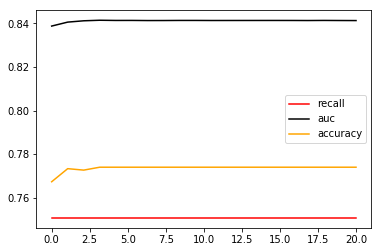

In [417]:
#追求平衡
import matplotlib.pyplot as plt
C_range = np.linspace(0.01,20,20)
recallall = []
aucall = []
scoreall = []
for C in C_range:
    clf = SVC(kernel = "linear",C=C,cache_size = 5000
              ,class_weight = "balanced"
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    recallall.append(recall)
    aucall.append(auc)
    scoreall.append(score)
    print("under C %f, testing accuracy is %f,recall is %f', auc is %f" % (C,score,recall,auc))
print(max(aucall),C_range[aucall.index(max(aucall))])
plt.figure()
plt.plot(C_range,recallall,c="red",label="recall")
plt.plot(C_range,aucall,c="black",label="auc")
plt.plot(C_range,scoreall,c="orange",label="accuracy")
plt.legend()
plt.show()

### 这里没用哑变量，没有处理大量的空值直接平均

In [448]:
X_train = Xtrain.copy()
X_test = Xtest.copy()
Y_train=Ytrain.copy()
Y_test = Ytest.copy()

In [440]:
from sklearn.preprocessing import OneHotEncoder
OneHot=OneHotEncoder().fit(X_train.loc[:,cate])
OneHot_x_train=pd.DataFrame(OneHot.transform(X_train.loc[:,cate]).toarray())
OneHot_x_test=pd.DataFrame(OneHot.transform(X_test.loc[:,cate]).toarray())

In [452]:
X_train_f = pd.concat([X_train,OneHot_x_train],axis=1)
X_test_f = pd.concat([X_test,OneHot_x_test],axis=1)
X_train_f.drop(cate,inplace=True,axis=1)
X_test_f.drop(cate,inplace=True,axis=1)

In [460]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()
#建模选择自然是我们的支持向量机SVC，首先用核函数的学习曲线来选择核函数
#我们希望同时观察，精确性，recall以及AUC分数
for kernel in ["linear","poly","rbf","sigmoid"]:
    clf = SVC(kernel = kernel
              ,gamma="auto"
              ,degree = 1
              ,cache_size = 2000).fit(X_train_f,Y_train)
    result = clf.predict(X_test_f)
    score = clf.score(X_test_f,Y_test)
    recall = recall_score(Y_test, result)
    auc = roc_auc_score(Y_test,clf.decision_function(X_test_f))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel,score,recall,auc))

linear 's testing accuracy 0.825333, recall is 0.465465', auc is 0.841865
poly 's testing accuracy 0.838667, recall is 0.450450', auc is 0.848522
rbf 's testing accuracy 0.846000, recall is 0.465465', auc is 0.847917
sigmoid 's testing accuracy 0.704000, recall is 0.333333', auc is 0.674340


In [461]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()
#建模选择自然是我们的支持向量机SVC，首先用核函数的学习曲线来选择核函数
#我们希望同时观察，精确性，recall以及AUC分数
for kernel in ["linear","poly","rbf","sigmoid"]:
    clf = SVC(kernel = kernel
              ,gamma="auto"
              ,degree = 1
              ,class_weight = {1:3}
              ,cache_size = 2000).fit(X_train_f,Y_train)
    result = clf.predict(X_test_f)
    score = clf.score(X_test_f,Y_test)
    recall = recall_score(Y_test, result)
    auc = roc_auc_score(Y_test,clf.decision_function(X_test_f))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel,score,recall,auc))

linear 's testing accuracy 0.776000, recall is 0.738739', auc is 0.835396
poly 's testing accuracy 0.784667, recall is 0.744745', auc is 0.844546
rbf 's testing accuracy 0.792000, recall is 0.732733', auc is 0.853051
sigmoid 's testing accuracy 0.602000, recall is 0.567568', auc is 0.653664


In [475]:
#高斯核效果最好，跑高斯核
#调月份为基准
s_m=StandardScaler().fit(pd.DataFrame(X_train_f.mouth))
s_m.transform(pd.DataFrame(X_train_f.mouth))
s_m.transform(pd.DataFrame(X_test_f.mouth))

array([[ 0.74444641],
       [-0.43214534],
       [-0.1379974 ],
       ...,
       [ 0.15615053],
       [-0.43214534],
       [ 0.74444641]])

In [476]:
X_train_f.mouth=s_m.transform(pd.DataFrame(X_train_f.mouth))
X_test_f.mouth =s_m.transform(pd.DataFrame(X_test_f.mouth))

In [477]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()
#建模选择自然是我们的支持向量机SVC，首先用核函数的学习曲线来选择核函数
#我们希望同时观察，精确性，recall以及AUC分数
for kernel in ["linear","poly","rbf","sigmoid"]:
    clf = SVC(kernel = kernel
              ,gamma="auto"
              ,degree = 1
              ,class_weight = {1:3}
              ,cache_size = 2000).fit(X_train_f,Y_train)
    result = clf.predict(X_test_f)
    score = clf.score(X_test_f,Y_test)
    recall = recall_score(Y_test, result)
    auc = roc_auc_score(Y_test,clf.decision_function(X_test_f))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel,score,recall,auc))

linear 's testing accuracy 0.775333, recall is 0.738739', auc is 0.835087
poly 's testing accuracy 0.784667, recall is 0.744745', auc is 0.844585
rbf 's testing accuracy 0.787333, recall is 0.744745', auc is 0.851649
sigmoid 's testing accuracy 0.782000, recall is 0.735736', auc is 0.843870


In [ ]:
import matplotlib.pyplot as plt
C_range = np.linspace(0.01,20,20)
for C in C_range:
    clf = SVC(kernel = 'rbf'
              ,gamma="auto"
              ,degree = 1
              ,class_weight = 'balanced'
              ,C=C
              ,cache_size = 5000).fit(X_train_f,Y_train)
    result = clf.predict(X_test_f)
    score = clf.score(X_test_f,Y_test)
    recall = recall_score(Y_test, result)
    auc = roc_auc_score(Y_test,clf.decision_function(X_test_f))
    print("C:%s,%s 's testing accuracy %f, recall is %f', auc is %f" % (C,kernel,score,recall,auc))

C:0.01,sigmoid 's testing accuracy 0.754000, recall is 0.717718', auc is 0.829145
C:1.0621052631578947,sigmoid 's testing accuracy 0.770667, recall is 0.765766', auc is 0.850480
C:2.114210526315789,sigmoid 's testing accuracy 0.774667, recall is 0.759760', auc is 0.849942
C:3.1663157894736838,sigmoid 's testing accuracy 0.782000, recall is 0.759760', auc is 0.849392
C:4.218421052631578,sigmoid 's testing accuracy 0.779333, recall is 0.753754', auc is 0.847663
C:5.270526315789473,sigmoid 's testing accuracy 0.775333, recall is 0.738739', auc is 0.846317
C:6.322631578947368,sigmoid 's testing accuracy 0.773333, recall is 0.735736', auc is 0.844626
C:7.374736842105262,sigmoid 's testing accuracy 0.775333, recall is 0.735736', auc is 0.843123
C:8.426842105263157,sigmoid 's testing accuracy 0.776667, recall is 0.738739', auc is 0.841636
C:9.478947368421052,sigmoid 's testing accuracy 0.772000, recall is 0.723724', auc is 0.840102
C:10.531052631578946,sigmoid 's testing accuracy 0.771333, re

In [ ]:
XGBoost本身

In [ ]:
dtrain = xgb.DMatrix(Xtrain,Ytrain)
dtest = xgb.DMatrix(Xtest,Ytest) #看看xgboost库自带的predict接口
param= {'silent':True,'objective':'binary:logistic',"eta":0.1,"scale_pos_weight":1}
num_round = 100
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest) #看看preds返回了什么？
preds
#自己设定阈值
ypred = preds.copy()
ypred[preds > 0.5] = 1
ypred[ypred != 1] = 0 #写明参数
scale_pos_weight = [1,5,10]
names = ["negative vs positive: 1"
         ,"negative vs positive: 5"
         ,"negative vs positive: 10"] #导入模型评估指标
from sklearn.metrics import accuracy_score as accuracy, recall_score as recall, 
roc_auc_score as auc
for name,i in zip(names,scale_pos_weight):
    param= {'silent':True,'objective':'binary:logistic'
           ,"eta":0.1,"scale_pos_weight":i}
    clf = xgb.train(param, dtrain, num_round)
    preds = clf.predict(dtest)
    ypred = preds.copy()
    ypred[preds > 0.5] = 1
    ypred[ypred != 1] = 0
    print(name)
    print("\tAccuracy:{}".format(accuracy(Ytest,ypred)))
    print("\tRecall:{}".format(recall(Ytest,ypred)))
    print("\tAUC:{}".format(auc(Ytest,preds)))
#当然我们也可以尝试不同的阈值
for name,i in zip(names,scale_pos_weight):
    for thres in [0.3,0.5,0.7,0.9]: